This script was written by Jacie R. McHaney for analyzing continuous speech EEG data.
<br> 
Created 10/28/2024
<br>

In [1]:
import os
import mne
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import glob
import pandas as pd

# Directories

In [2]:
# directory to raw EEG data
main_dir = os.path.join('/Users/myk4766/Library/CloudStorage/OneDrive-SharedLibraries-NorthwesternUniversity/SoundBrain Lab - Documents/Lab Research Projects/Experiments/NU_Experiments/EHL1')
mix_dir = os.path.join(main_dir, 'data/EEG')
data_dir = os.path.join(mix_dir, 'processed/ref_down_filt')
out_dir = os.path.join(data_dir, 'epoch_artrej')
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

# Parameters

In [36]:
# Parameters
trigs = list(range(1,4))
epochmin = -2
epochmax = 56 #length of shortest alice track in seconds
montname = os.path.join(main_dir, 'analysis/EEG/biosemi_32ch_2mastoid_locs.csv')
trigtimes = pd.read_csv(f"{main_dir}/data/EEG/EHL1_adjusted_triggertimes.csv") #get this from `FIRSTSTEP_findtriglags.m` script in matlab.
n_evts = 15

In [5]:
trigtimes

,filename,trigger,newtime_sec,samps_to_add
0,sub-01_ses-1_task-alice_acq-1.bdf,1,115.936890,14840
1,sub-01_ses-1_task-alice_acq-1.bdf,2,87.785034,11236
2,sub-01_ses-1_task-alice_acq-1.bdf,3,161.506104,20673
3,sub-01_ses-1_task-alice_acq-1.bdf,4,148.740540,19039
4,sub-01_ses-1_task-alice_acq-1.bdf,5,147.695923,18905
5,sub-01_ses-1_task-alice_acq-1.bdf,6,146.029236,18692
6,sub-01_ses-1_task-alice_acq-1.bdf,7,146.214233,18715
7,sub-01_ses-1_task-alice_acq-1.bdf,8,147.196716,18841
8,sub-01_ses-1_task-alice_acq-1.bdf,9,151.594788,19404
9,sub-01_ses-1_task-alice_acq-1.bdf,10,157.569519,20169


# Read in data files

In [37]:
#get list of files processed in step 1
files = [i for i in os.listdir(data_dir) if i.endswith('.fif')]
len(files)

4

In [38]:
#read in current subject file
fn = files[0]
fif_path = os.path.join(data_dir, fn)
data_filtered = mne.io.read_raw_fif(fif_path, preload=True)

Opening raw data file /Users/myk4766/Library/CloudStorage/OneDrive-SharedLibraries-NorthwesternUniversity/SoundBrain Lab - Documents/Lab Research Projects/Experiments/NU_Experiments/EHL1/data/EEG/processed/ref_down_filt/sub-01_ses-1_task-mix_acq-2_ref_down_filt.fif...
    Range : 0 ... 155647 =      0.000 ...  1215.992 secs
Ready.
Reading 0 ... 155647  =      0.000 ...  1215.992 secs...


/var/folders/bf/vdwr42sn4y3dvl75qxbvjspw0000gq/T/ipykernel_76477/4125950438.py:4: RuntimeWarning: This filename (/Users/myk4766/Library/CloudStorage/OneDrive-SharedLibraries-NorthwesternUniversity/SoundBrain Lab - Documents/Lab Research Projects/Experiments/NU_Experiments/EHL1/data/EEG/processed/ref_down_filt/sub-01_ses-1_task-mix_acq-2_ref_down_filt.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data_filtered = mne.io.read_raw_fif(fif_path, preload=True)


# Epoch Data

## Find trigger events

In [ ]:
#original trigger times
events = mne.find_events(data_filtered, stim_channel = 'Status', initial_event=False)
print(events)

Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
16 events found on stim channel Status
Event IDs: [ 16  17  18  19  20  21  22  23  24  25  26  27  28  29  30 255]
[[  3059      0    255]
 [  4679      0     16]
 [ 13919      0     17]
 [ 24315      0     18]
 [ 34217      0     19]
 [ 44142      0     20]
 [ 55043      0     21]
 [ 64541      0     22]
 [ 73621      0     23]
 [ 83351      0     24]
 [ 94130      0     25]
 [104427      0     26]
 [113763      0     27]
 [123249      0     28]
 [133039      0     29]
 [143414      0     30]]


In [44]:
#remove unwanted trigger event 255
events = mne.pick_events(events, exclude=255)
print(events)

[[  4679      0     16]
 [ 13919      0     17]
 [ 24315      0     18]
 [ 34217      0     19]
 [ 44142      0     20]
 [ 55043      0     21]
 [ 64541      0     22]
 [ 73621      0     23]
 [ 83351      0     24]
 [ 94130      0     25]
 [104427      0     26]
 [113763      0     27]
 [123249      0     28]
 [133039      0     29]
 [143414      0     30]]


In [42]:
%matplotlib

Using matplotlib backend: MacOSX


Channels marked as bad:
none


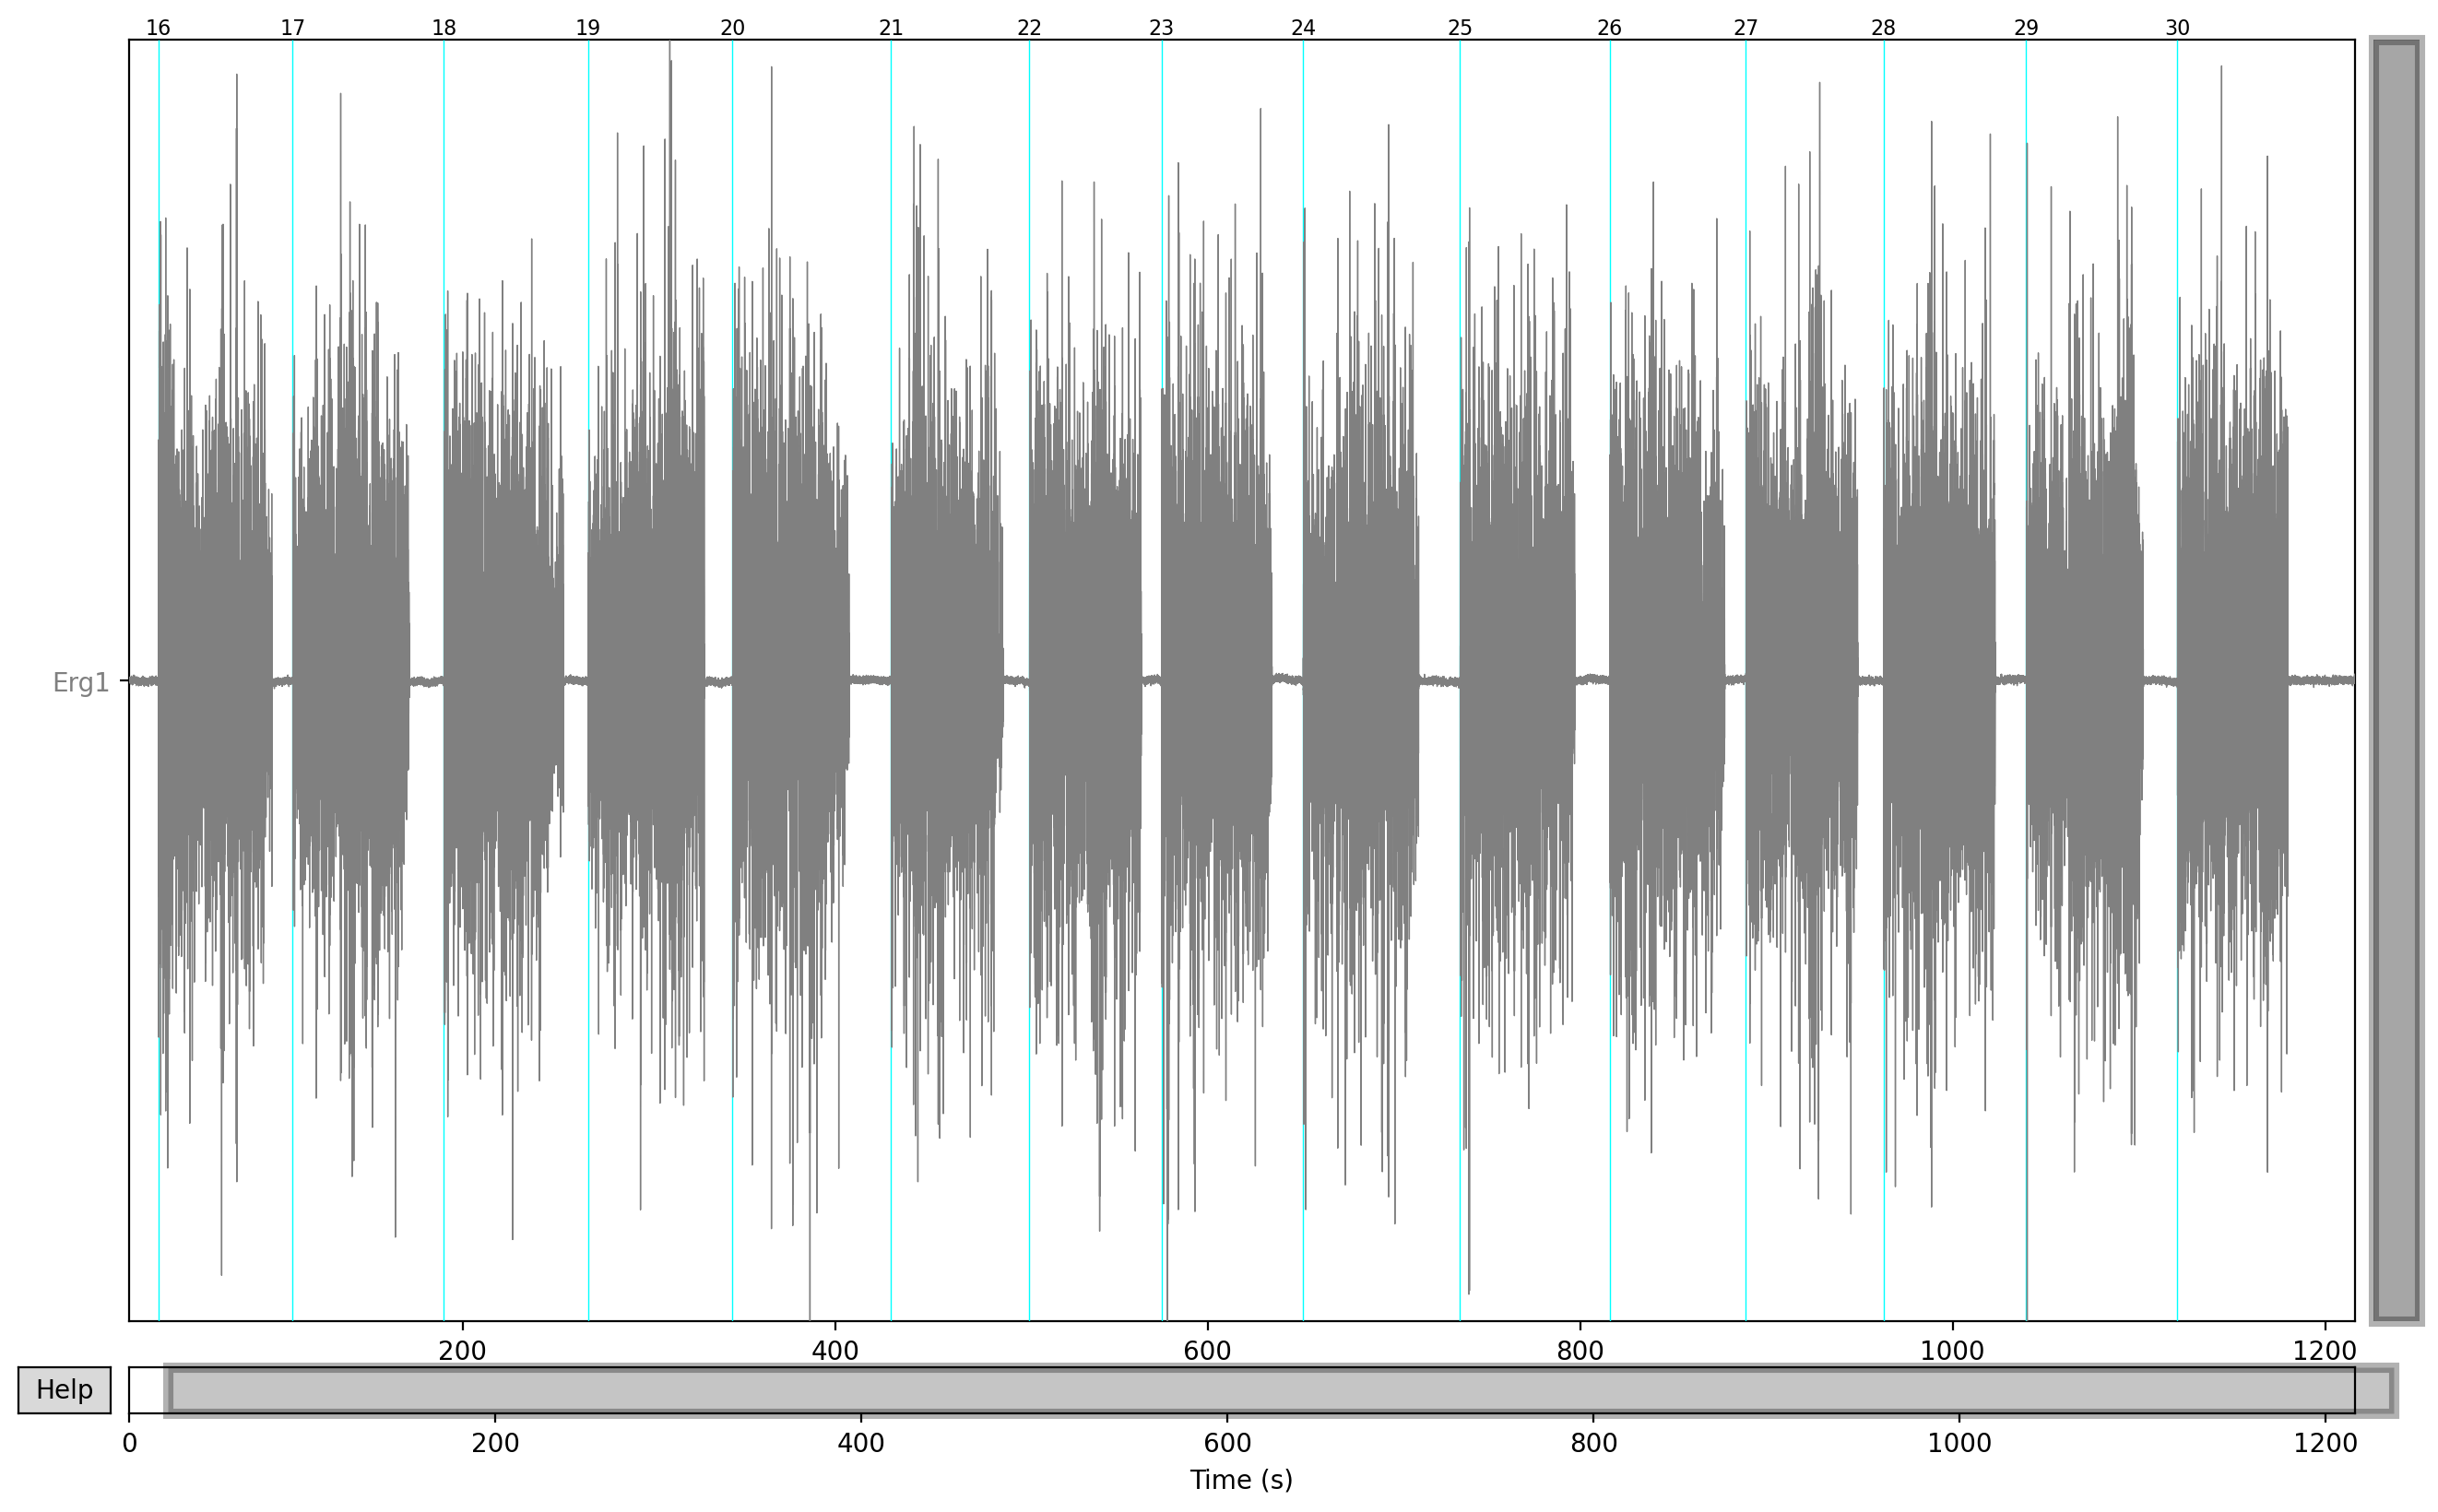

Channels marked as bad:
none


In [ ]:
#plot erg channel with original triggers
#define start
t1start = (events[0,0]-2000)/data_filtered.info['sfreq']
tend = events[1,0]+(data_filtered.info['sfreq']*5*60)
data_filtered.plot(
    events=events,
    start=t1start,
    duration=tend,
    color="gray",
    picks='Erg1'
)

# Adjust trigger times

In [25]:
namepts = fn.split('_')
newfn = f'{namepts[0]}_{namepts[1]}_{namepts[2]}_{namepts[3]}'
newfn

'sub-01_ses-1_task-mix_acq-2'

In [26]:
newevts = events
subtimes = trigtimes[trigtimes['filename'].str.contains(newfn)]

for evt in range(0,n_evts):
    tmptrig = evt+1
    currinfo = subtimes[subtimes['trigger']==tmptrig]
    trigadj = currinfo['samps_to_add'].tolist()
    newevts[evt,0]=newevts[evt,0]+trigadj

newevts  

/var/folders/bf/vdwr42sn4y3dvl75qxbvjspw0000gq/T/ipykernel_76477/110263104.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  newevts[evt,0]=newevts[evt,0]+trigadj


array([[  6312,      0,     16],
       [ 23173,      0,     17],
       [ 34726,      0,     18],
       [ 44132,      0,     19],
       [ 54082,      0,     20],
       [ 65958,      0,     21],
       [ 74054,      0,     22],
       [ 82714,      0,     23],
       [ 93094,      0,     24],
       [104922,      0,     25],
       [114738,      0,     26],
       [123114,      0,     27],
       [132749,      0,     28],
       [142843,      0,     29],
       [153802,      0,     30]])

In [ ]:
epochs = mne.Epochs(data_filtered, 
                    events = newevts, 
                    tmin = epochmin, tmax = epochmax, 
                    baseline = None,
                    preload=True)


Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 15 events and 9217 original time points ...
1 bad epochs dropped


In [32]:
epochs.info

<Info | 11 non-empty values
 bads: []
 ch_names: Fp1, AF3, F7, F3, FC1, FC5, T7, C3, CP1, CP5, P7, P3, Pz, PO3, ...
 chs: 34 EEG, 2 EOG, 2 Stimulus
 custom_ref_applied: True
 dig: 37 items (3 Cardinal, 34 EEG)
 file_id: 4 items (dict)
 highpass: 1.0 Hz
 lowpass: 15.0 Hz
 meas_date: 2025-01-08 12:42:30 UTC
 meas_id: 4 items (dict)
 nchan: 38
 projs: []
 sfreq: 128.0 Hz
>

/var/folders/bf/vdwr42sn4y3dvl75qxbvjspw0000gq/T/ipykernel_76477/1578063378.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = epochs.average("all").plot(**plot_kwargs)


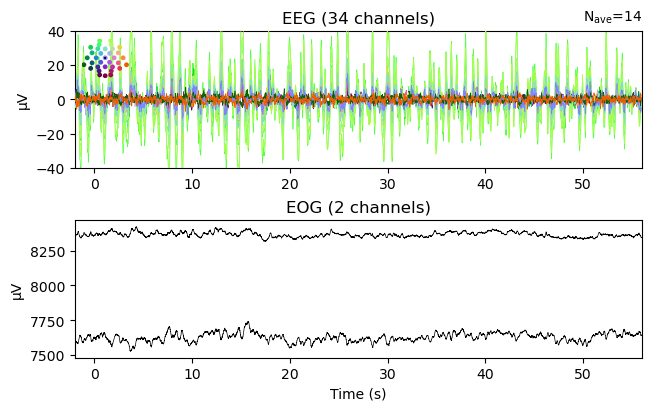

In [29]:
plot_kwargs = dict(picks='all', ylim=dict(eeg=(-40, 40))) #, eog=(-5, 15)))
fig = epochs.average("all").plot(**plot_kwargs) 
fig.set_size_inches(6, 6)

# Artifact Rejection

In [24]:
# Perform regression using the EOG sensor as independent variable and the EEG
# sensors as dependent variables.
model_plain = mne.preprocessing.EOGRegression(picks="eeg", picks_artifact="eog").fit(epochs)
fig = model_plain.plot()  # regression coefficients as topomap
fig.set_size_inches(3, 2)

No projector specified for this dataset. Please consider the method self.add_proj.


No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)


/var/folders/bf/vdwr42sn4y3dvl75qxbvjspw0000gq/T/ipykernel_97671/1703069577.py:8: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochs_clean_plain.average("all").plot(**plot_kwargs)


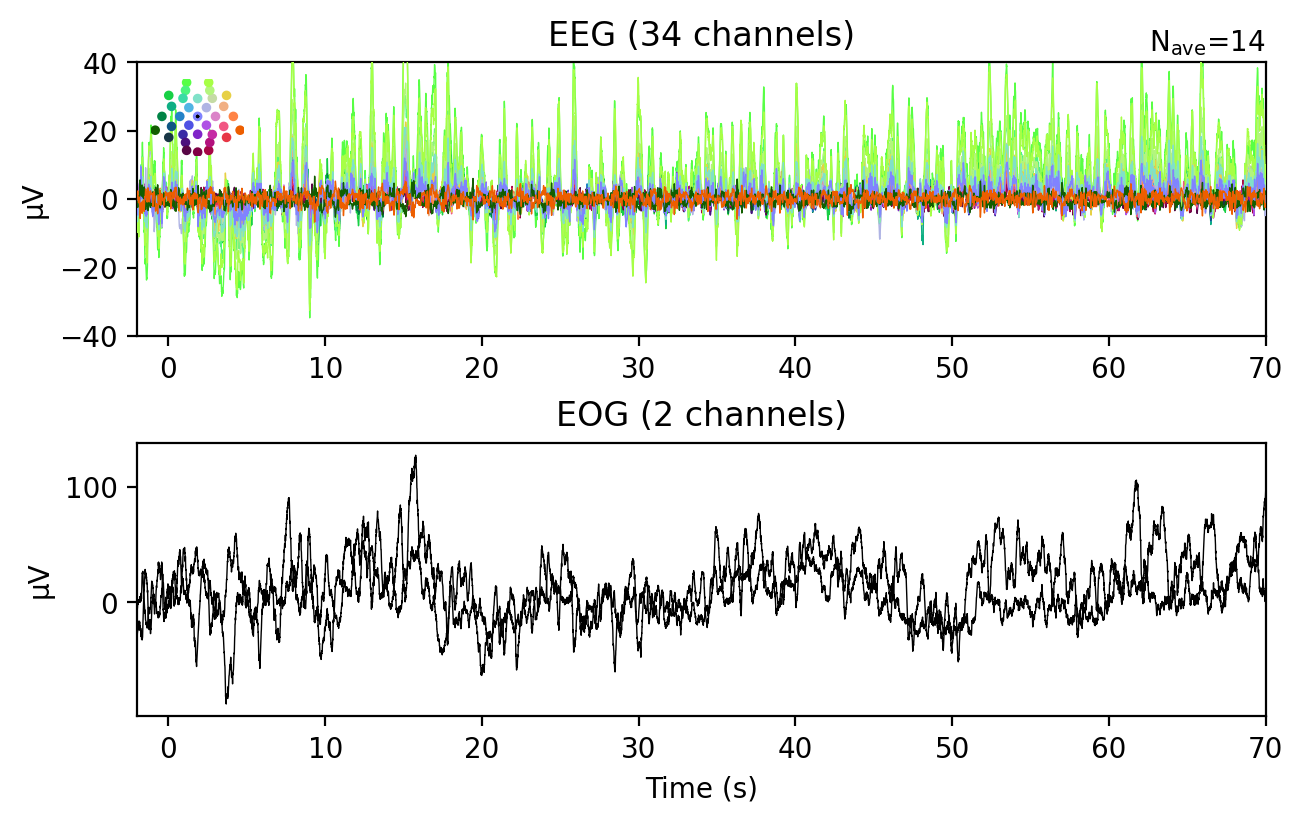

In [25]:
#now substract EOG from the EEG
epochs_clean_plain = model_plain.apply(epochs)

# After regression, we should redo the baseline correction
epochs_clean_plain.apply_baseline()

# Show the evoked potential computed on the corrected data
epochs_clean_plain.average("all").plot(**plot_kwargs)


Subtracting Evoked from Epochs
    The following channels are not included in the subtraction: HEOG, Erg1, Status, VE0G
[done]
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)


/var/folders/bf/vdwr42sn4y3dvl75qxbvjspw0000gq/T/ipykernel_24673/3313896303.py:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochs_clean_sub.average("all").plot(**plot_kwargs)


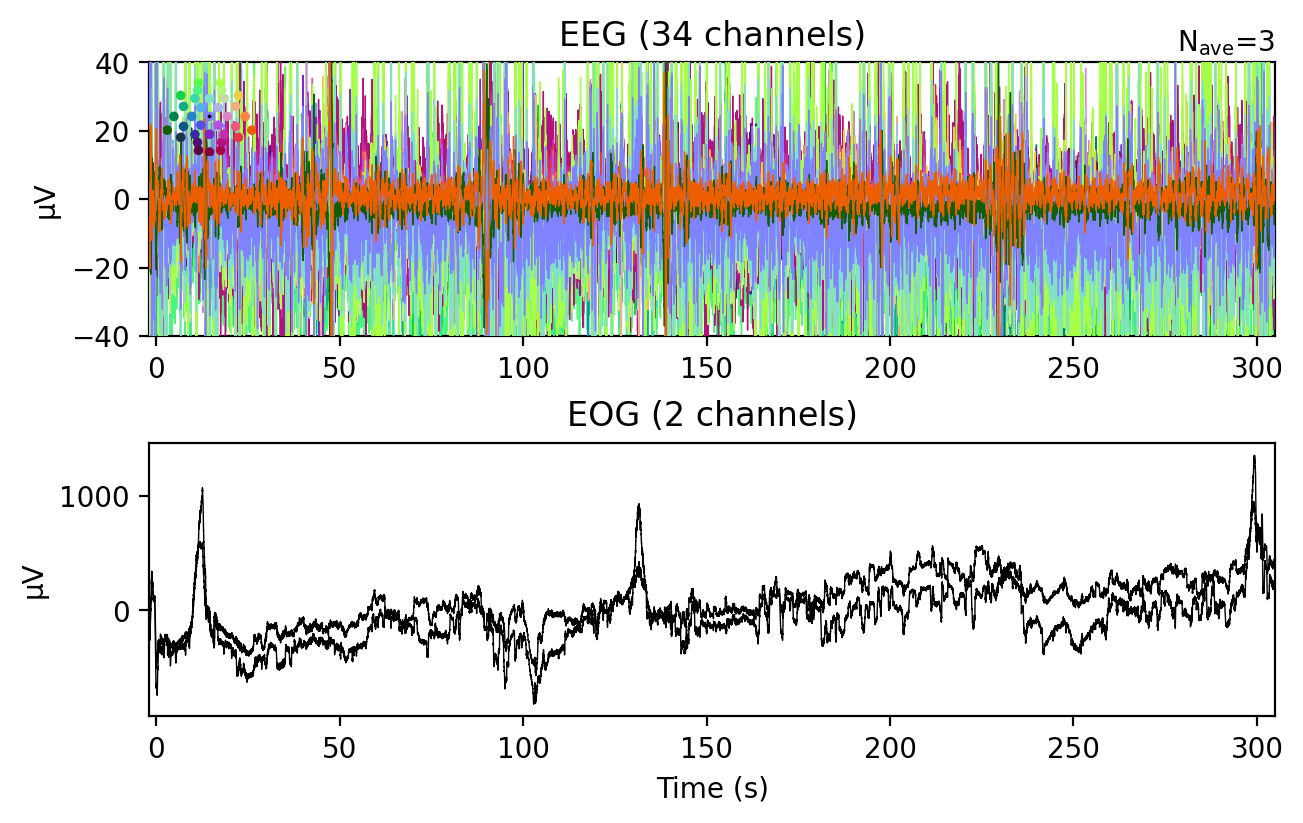

In [47]:
# create epochs with the evoked subtracted out
epochs_sub = epochs.copy().subtract_evoked()

# perform regression
model_sub = mne.preprocessing.EOGRegression(picks="eeg", picks_artifact="eog").fit(epochs_sub)
fig = model_sub.plot()
fig.set_size_inches(3, 2)

# apply the regression coefficients to the original epochs
epochs_clean_sub = model_plain.apply(epochs).apply_baseline()
epochs_clean_sub.average("all").plot(**plot_kwargs)

# Save

In [49]:
#save the modified data
cleandat = epochs_clean_sub
Toutname = fn[0:len(fn)-4]
outname = f'{Toutname}__epoch_artrej.fif'
savename = os.path.join(out_dir, outname)
cleandat.save(savename)

/var/folders/bf/vdwr42sn4y3dvl75qxbvjspw0000gq/T/ipykernel_24673/1859255230.py:6: RuntimeWarning: This filename (/Users/myk4766/Library/CloudStorage/OneDrive-SharedLibraries-NorthwesternUniversity/SoundBrain Lab - Documents/Lab Research Projects/Experiments/NU_Experiments/AuD_PRP/DATA/EEG_data/processed/ref_down_filt/epoch_artrej/sub-01_ses-2_task-75mo_acq-4_ref_down_filt__epoch_artrej.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  cleandat.save(savename)
